### PREPROC AND EDA
## Basic analysis:
- seeing number of null values and outliers

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')
total null value count is 0
no outliers for DTI Ratio by seeing violin plot
no correlation between Income and Default by seeing scatter plot


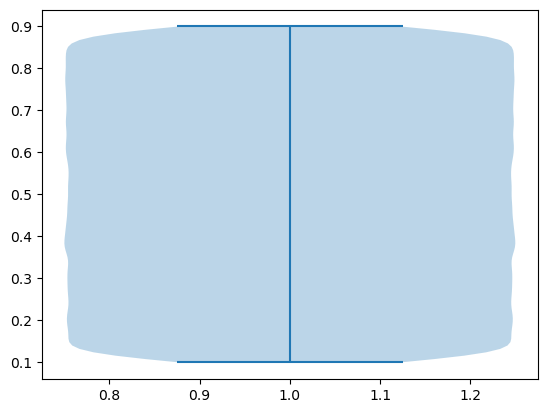

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/train.csv')
print(df.columns)

LoanID = df['LoanID']
df = df.drop(columns=['LoanID']) # a useless column

# print(df.head())

nv = df.isna().sum()
nvt = nv.sum()
print('total null value count is', nvt)

# there are no null values

# let's look for outliers
# for that let's draw some box plots/ violin plots

plt.violinplot(df['DTIRatio'])
# no outliers
print('no outliers for DTI Ratio by seeing violin plot')
# print(df.groupby('Education').size()) # roughly same number of people in each category

#let's do something interesting, according to kushal, there is no correlation between any two variables
# we verify that
# plt.scatter(df['Income'], df['Default']) 
print('no correlation between Income and Default by seeing scatter plot')
# clearly no correlation



#similarly there is no correlation between any two vars as we will soon see


## Univariate Plots
- Bar charts for categorical vars
- Histograms for continuous vars
- We see that it is largely uniform

Dropped LoanID


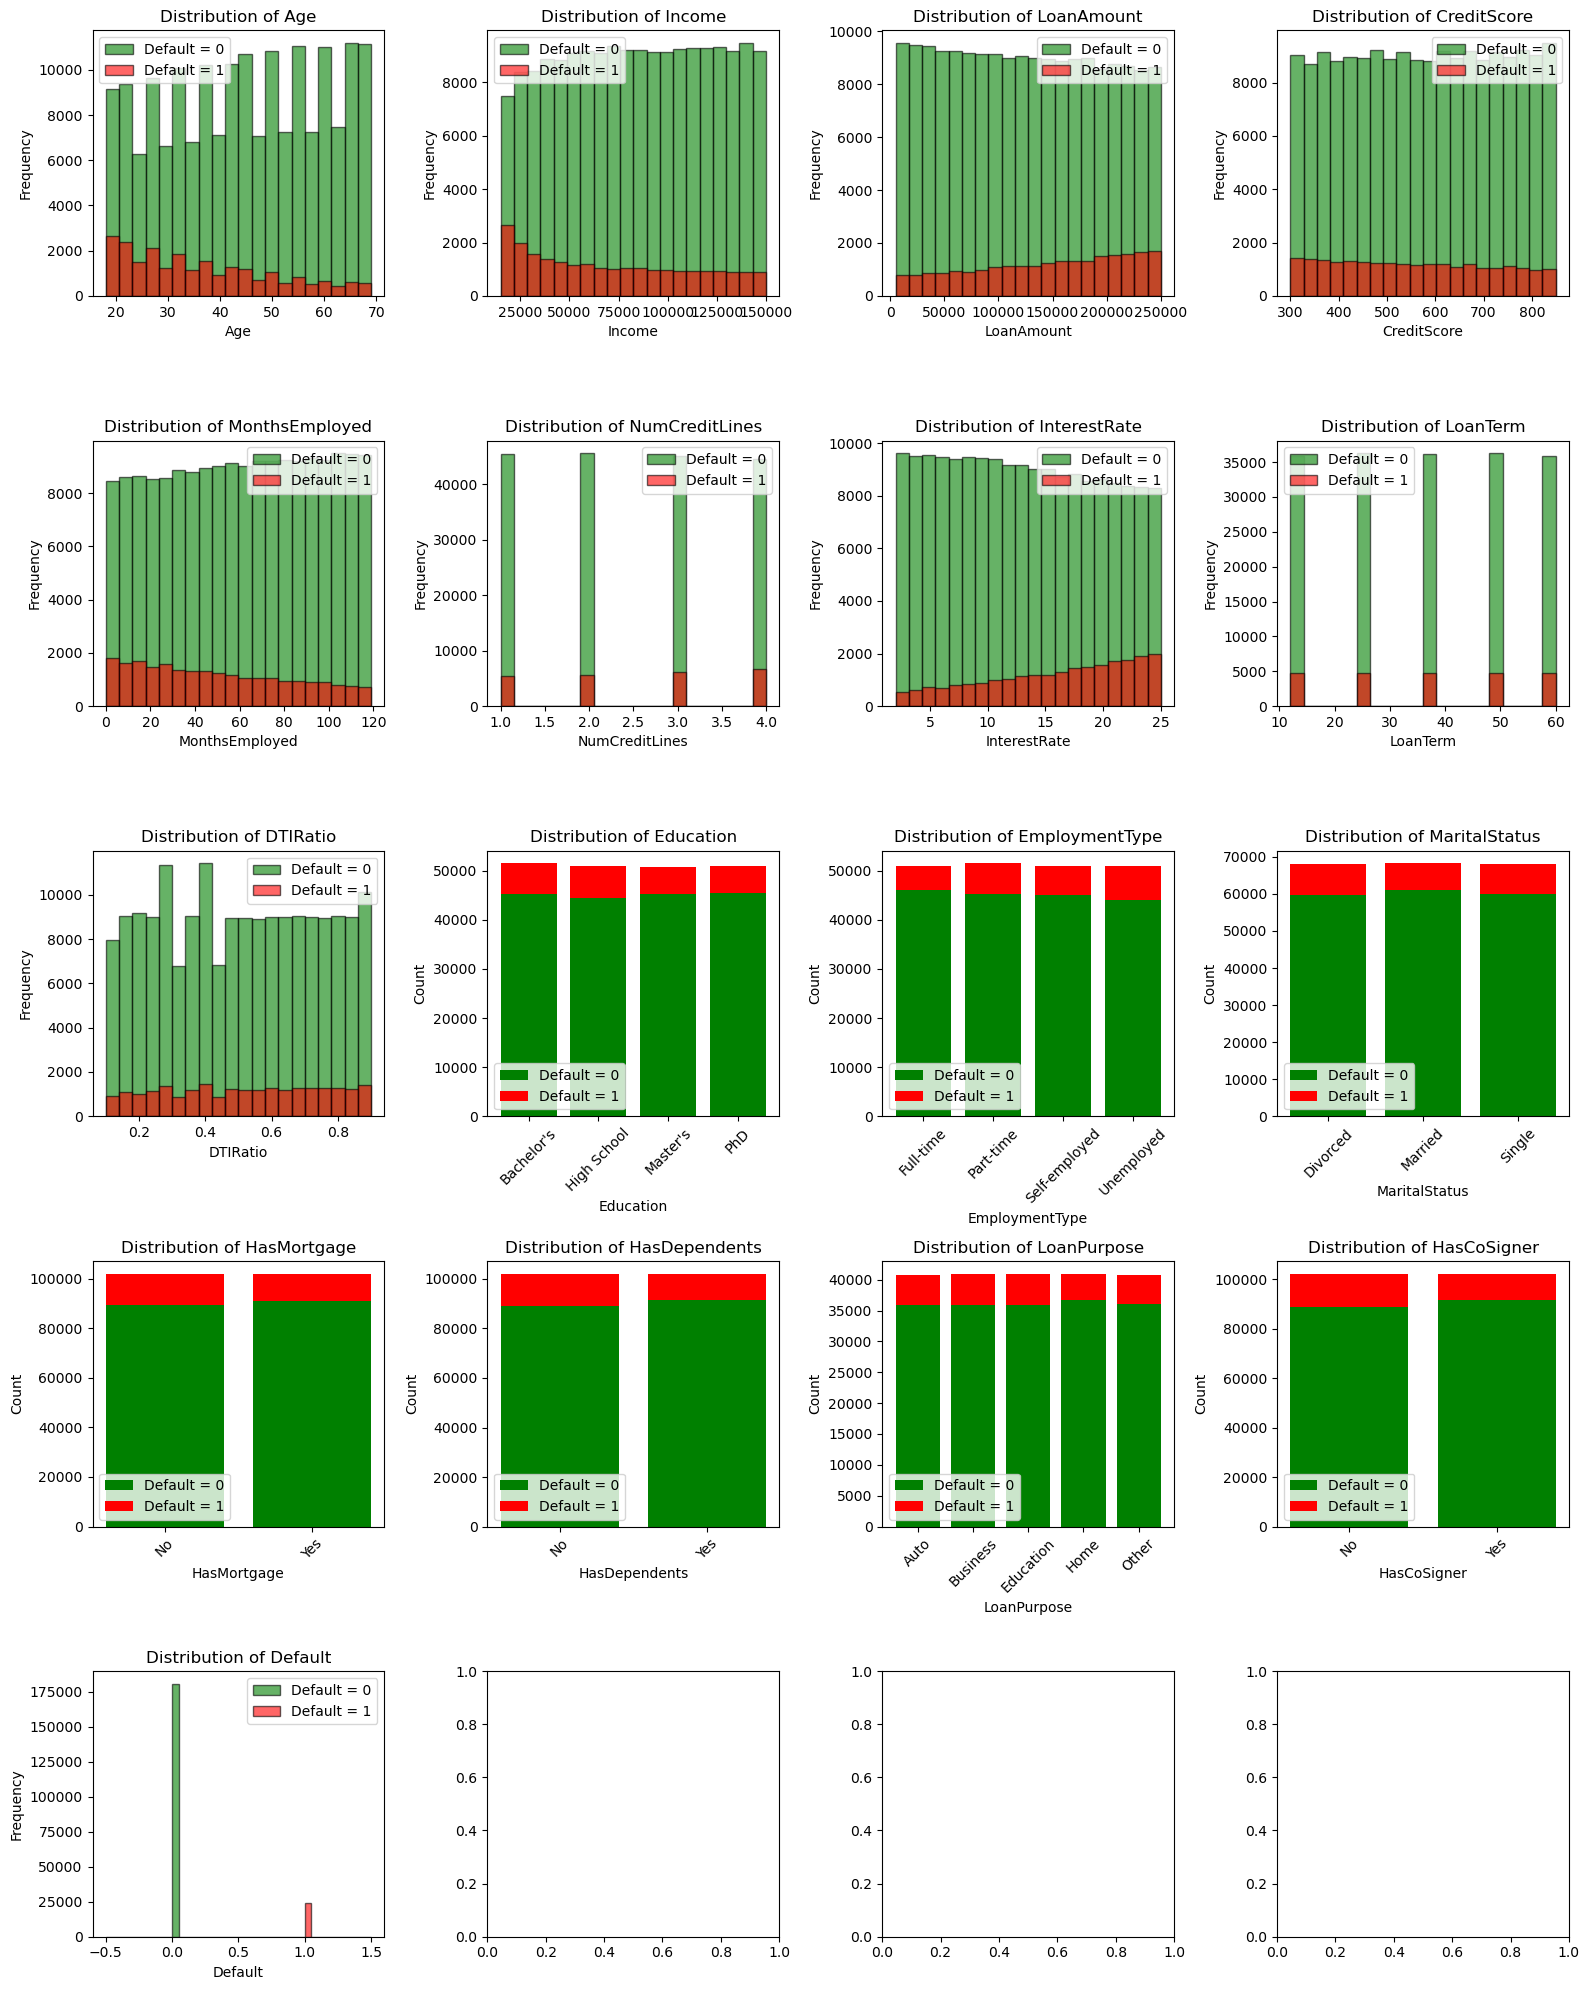

In [34]:
# # this cell will focus on making univariate plots
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# df = pd.read_csv('./data/train.csv')

# if 'LoanID' in df.columns:
#     df = df.drop(columns=['LoanID'])
#     print('Dropped LoanID')

# # df = df[df['Default'] == 1]
# num_columns = len(df.columns)

# # Set up a figure with an adjustable size and grid layout (e.g., 4 columns per row)
# fig, ax = plt.subplots(nrows=(num_columns // 4) + (num_columns % 4 > 0), ncols=4, figsize=(16, 4 * ((num_columns // 4) + 1)))
# ax = ax.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# # Loop through the columns and create the plots
# for i, column in enumerate(df.columns):
#     if df[column].dtype == 'object':  # if the column is categorical we need bar
#         category_counts = df[column].value_counts()

#         ax[i].bar(category_counts.index, category_counts.values)
#         ax[i].set_title(f'Distribution of {column}')
#         ax[i].set_xlabel(column)
#         ax[i].set_ylabel('Count')
        
#         # Rotate x-axis labels for better readability (if necessary)
#         ax[i].tick_params(axis='x', rotation=45)
        
#     else:  # ow use histogram
#         ax[i].hist(df[column].dropna(), bins=20, color='blue', edgecolor='black')
#         ax[i].set_title(f'Distribution of {column}')
#         ax[i].set_xlabel(column)
#         ax[i].set_ylabel('Frequency')

# # Adjust layout to prevent overlap of subplots
# plt.tight_layout()

# # Show the plots
# plt.show()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/train.csv')

if 'LoanID' in df.columns:
    df = df.drop(columns=['LoanID'])
    print('Dropped LoanID')

# Set up a figure with an adjustable size and grid layout (e.g., 4 columns per row)
num_columns = len(df.columns)

# Set up the subplots layout
fig, ax = plt.subplots(nrows=(num_columns // 4) + (num_columns % 4 > 0), ncols=4, figsize=(16, 4 * ((num_columns // 4) + 1)))
ax = ax.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Loop through the columns and create the plots
for i, column in enumerate(df.columns):
    if df[column].dtype == 'object':  # If the column is categorical
        # Group by the category and 'Default' to count occurrences of each combination
        category_counts = df.groupby([column, 'Default']).size().unstack(fill_value=0)
        
        # Separate the counts based on Default (0 or 1)
        category_counts_0 = category_counts.get(0, 0)  # Default == 0
        category_counts_1 = category_counts.get(1, 0)  # Default == 1

        # Plot the stacked bars: Default == 1 (red) and Default == 0 (green)
        ax[i].bar(category_counts.index, category_counts_0, color='green', label='Default = 0')
        ax[i].bar(category_counts.index, category_counts_1, color='red', label='Default = 1', bottom=category_counts_0)
        
        # Set titles and labels
        ax[i].set_title(f'Distribution of {column}')
        ax[i].set_xlabel(column)
        ax[i].set_ylabel('Count')

        # Rotate x-axis labels for better readability (if necessary)
        ax[i].tick_params(axis='x', rotation=45)
        
        # Add legend
        ax[i].legend()

    else:  # If the column is numeric, use histogram
        # Split the data into two groups based on the 'Default' column
        df_0 = df[df['Default'] == 0][column].dropna()  # Default = 0
        df_1 = df[df['Default'] == 1][column].dropna()  # Default = 1
        
        # Plot histograms for Default = 0 (green) and Default = 1 (red)
        ax[i].hist(df_0, bins=20, color='green', edgecolor='black', alpha=0.6, label='Default = 0')
        ax[i].hist(df_1, bins=20, color='red', edgecolor='black', alpha=0.6, label='Default = 1')

        # Set titles and labels
        ax[i].set_title(f'Distribution of {column}')
        ax[i].set_xlabel(column)
        ax[i].set_ylabel('Frequency')

        # Add legend
        ax[i].legend()

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plots
plt.show()


## PairPlots
- scatter plots or kde based depending on the combination of variables
- no correlation between two varaibles seen

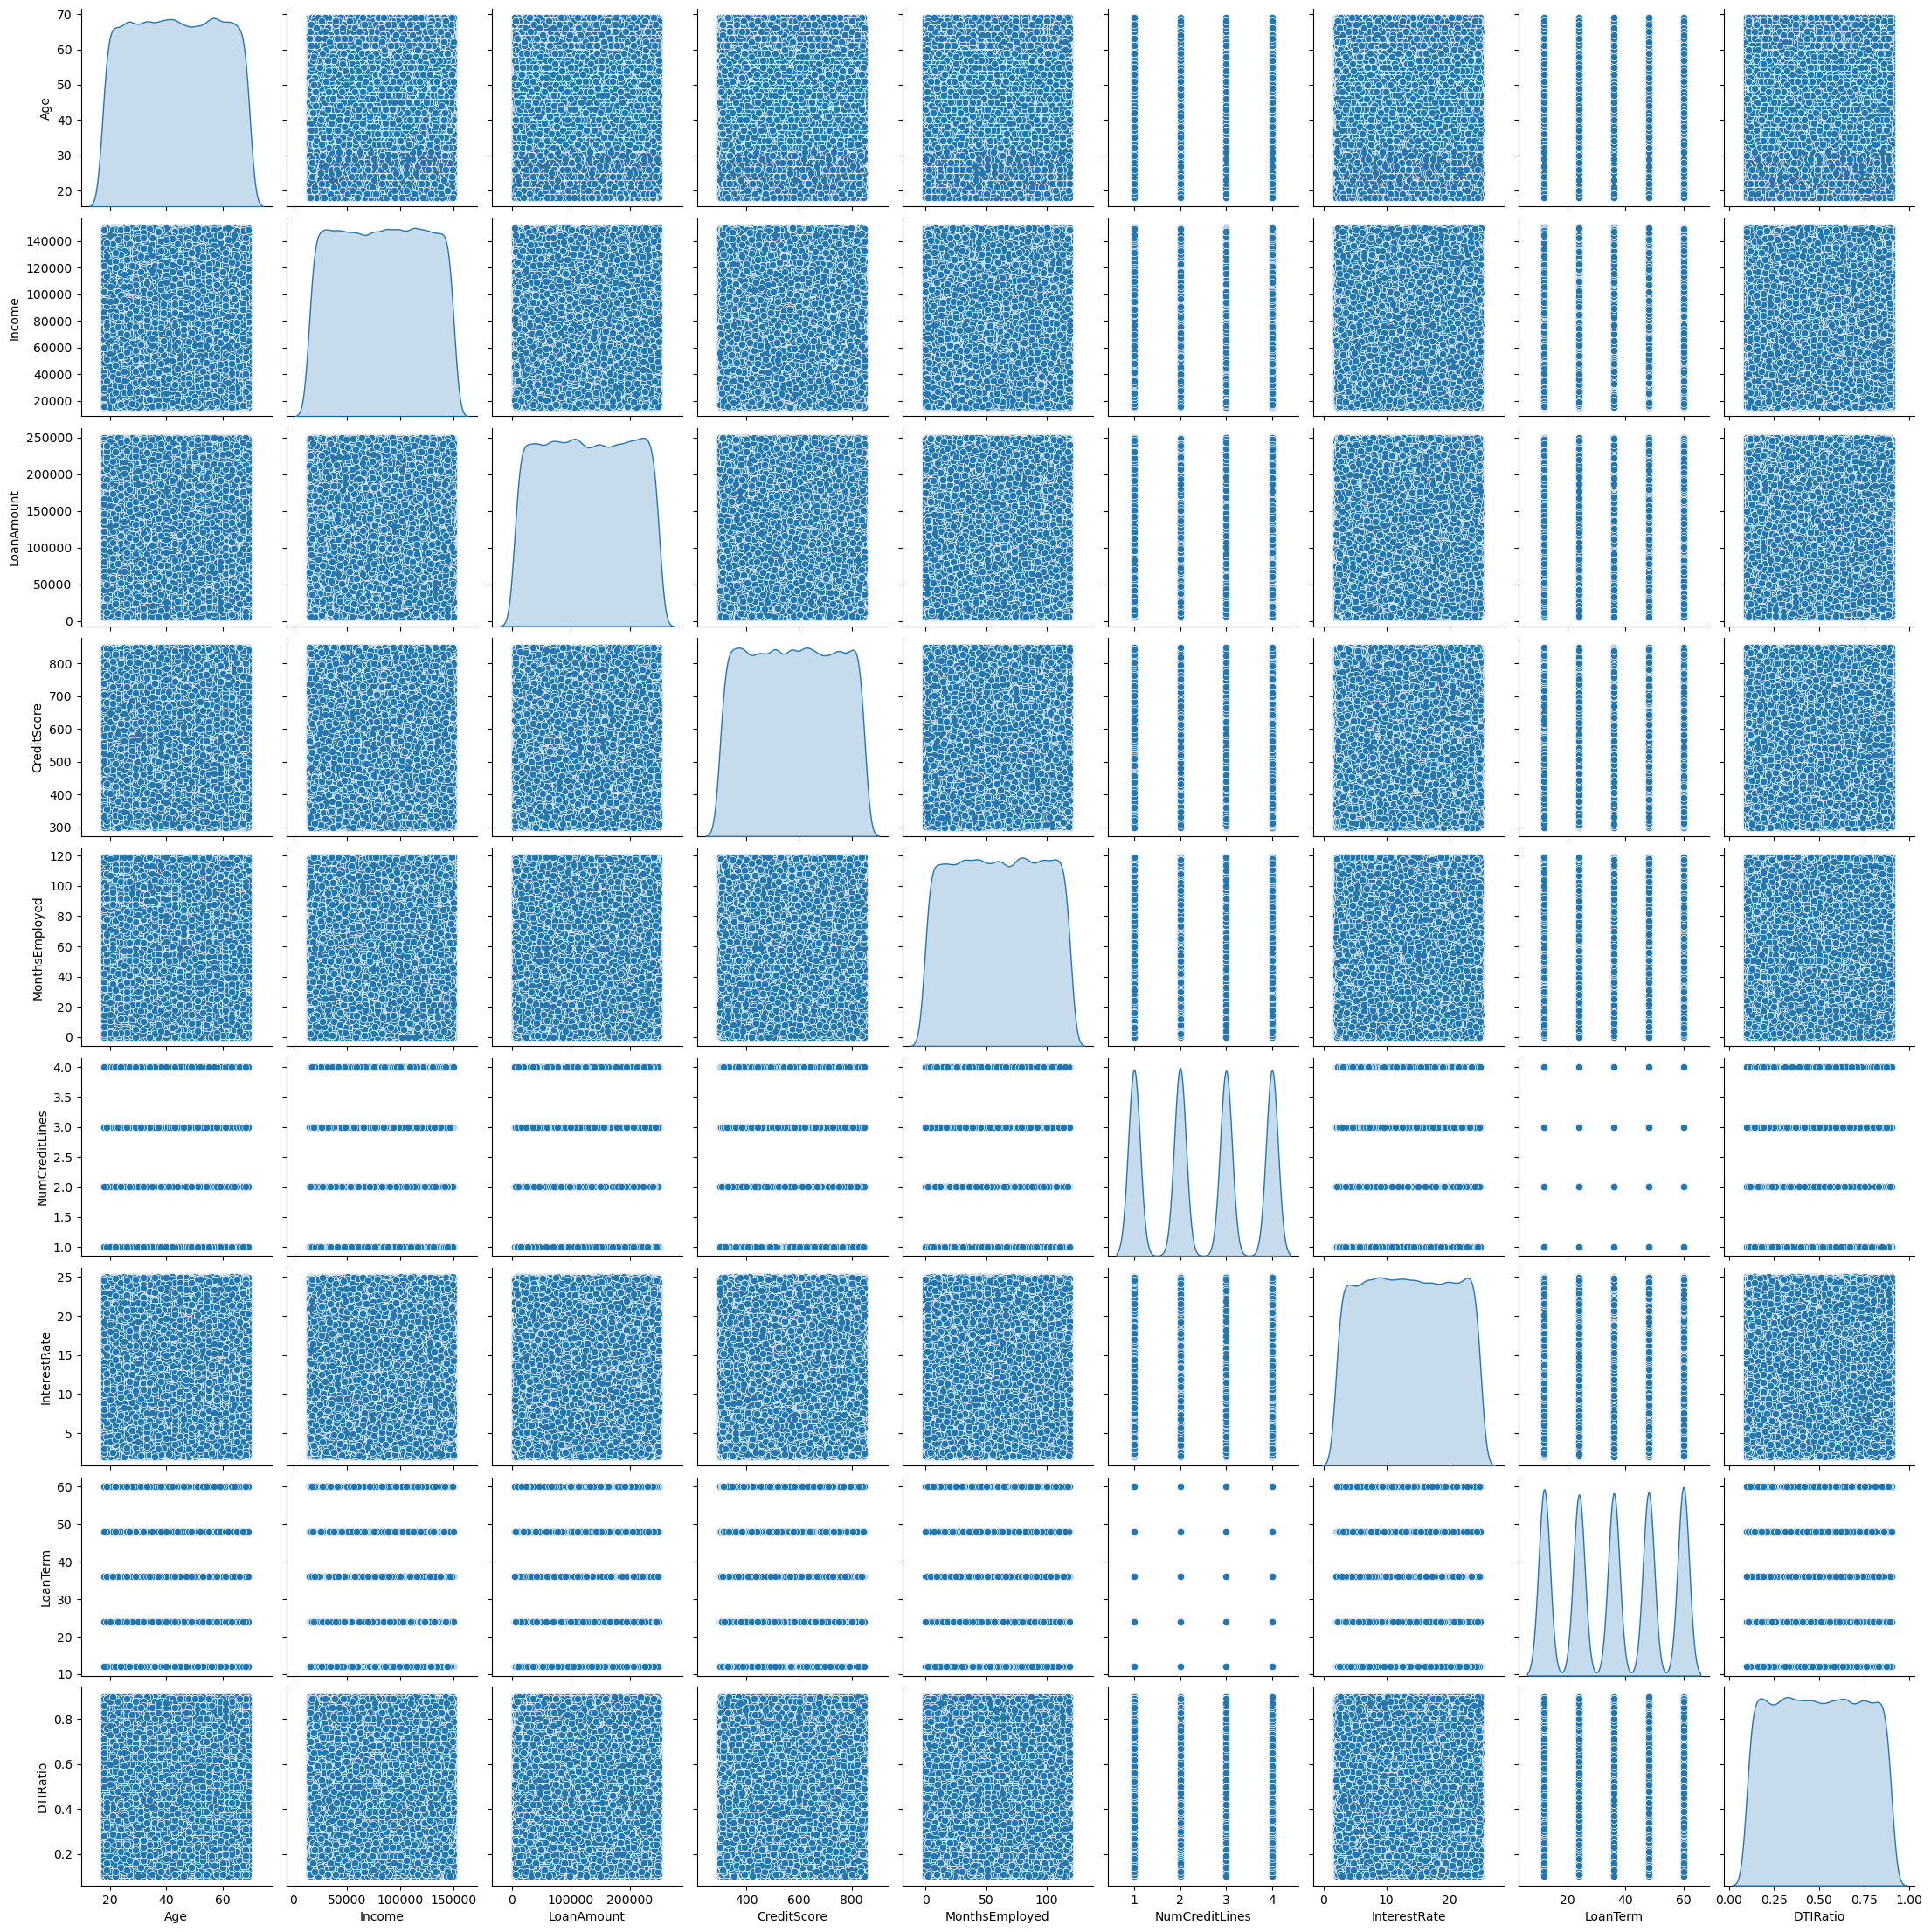

In [ ]:
import seaborn as sns
import pandas as pd
data = pd.read_csv('./data/test.csv')

sns.pairplot(data, diag_kind='kde', kind='scatter')

# this clearly shows that all variables are very evenly distributed and there is no real correlation between them....

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object


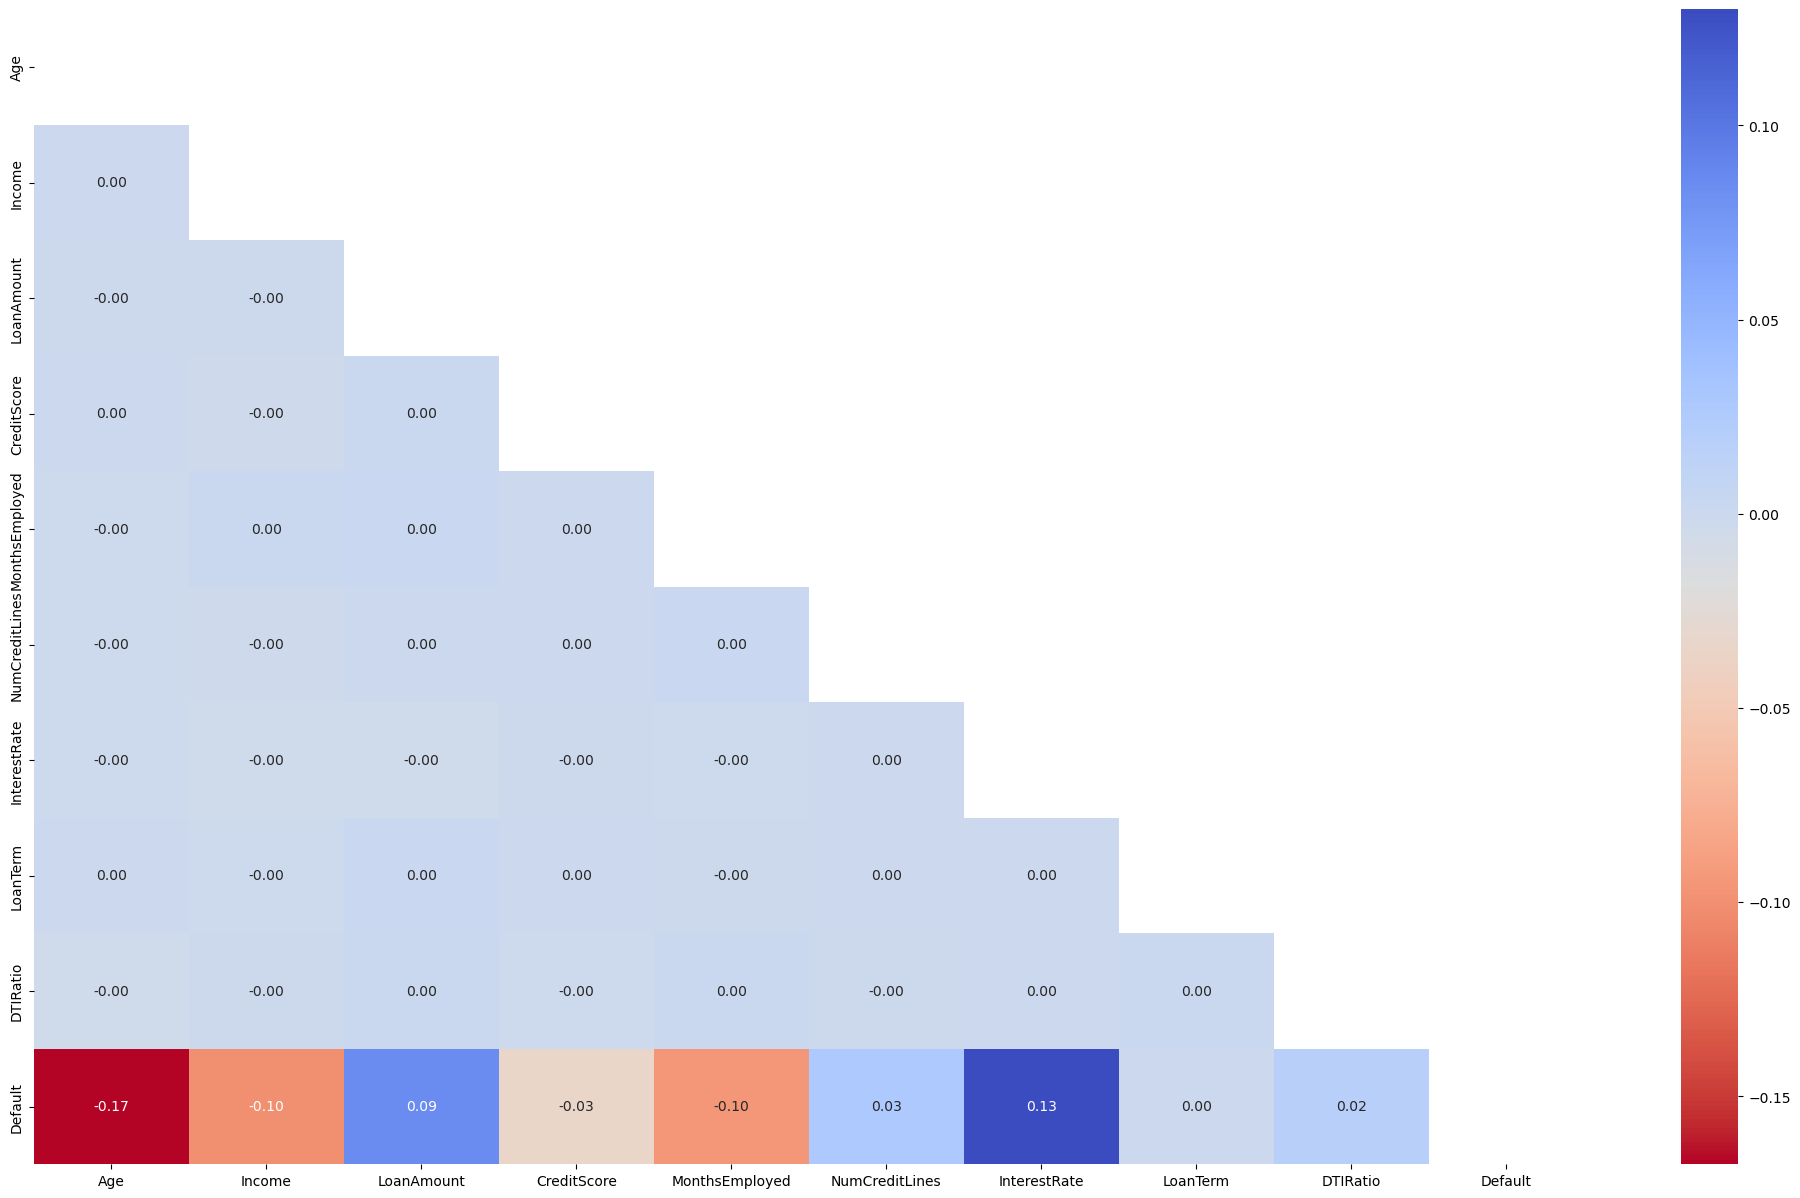

In [ ]:
# heatmap similar to previous two things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./data/train.csv')
print(df.dtypes)
numeric_cols = [col for col, type1 in zip(df.columns, df.dtypes) if type1 != 'object']
df_num = df.loc[:, numeric_cols]
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool)) # upper triangle is enough
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask, cmap='coolwarm_r')
plt.show()

# the heatmap for numerical features shows that no two of them are correlated